In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# houses my function to connect to Codeup DB
import wrangle
pd.set_option('display.max_columns', None)
import wrangle_zillow
import warnings
warnings.simplefilter("ignore")

In [2]:
df = wrangle_zillow.get_zillow_csv()
# df.shape
# pd.crosstab(df.bathroomcnt, df.fullbathcnt)
# pd.crosstab(df.roomcnt,df.bedroomcnt)
# pd.crosstab(df.yardbuildingsqft17, df.yardbuildingsqft26)
# df.poolsizesum.value_counts(dropna=False)
# df.taxdelinquencyflag.value_counts(dropna=False)
# df.taxdelinquencyyear.value_counts(dropna= False)

# df.basementsqft = df.basementsqft.fillna(0)
# df.dropna(subset = ['calculatedfinishedsquarefeet'], inplace=True)
# df.fireplacecnt = df.fireplacecnt.fillna(0.0)
# df.garagecarcnt = df.garagecarcnt.fillna(0.0)
df
# df.garagetotalsqft.value_counts(dropna=False)
# df[(df.propertylandusedesc == 'Single Family Residential') | (df.propertylandusedesc == 'Mobile Home')]
# df.lotsizesquarefeet = df.lotsizesquarefeet.fillna(0.0)
# df.poolcnt = df.poolcnt.fillna(0)
# df = df.dropna(subset = ['yearbuilt','regionidzip'])

# print(df.regionidzip.isnull().value_counts())
# df[df.roomcnt ==0.0]
# df.yearbuilt = df.yearbuilt.astype(int)
# df.yearbuilt = df.yearbuilt.astype(int)
# df.taxdelinquencyflag = df.taxdelinquencyflag.fillna('N')
# df.head()
# df[df.airconditioningdesc.isnull()]
# df.airconditioningdesc = df.airconditioningdesc.fillna('Yes')
# 6059.0 orange county california
# 6111.0 ventura county california
# 6037.0 los angeles county california
# print(np.isinf(df.regionidzip).value_counts())
# print(df.shape)
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fireplacecnt,latitude,longitude,lotsizesquarefeet,poolcnt,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxdelinquencyflag,censustractandblock,propertylandusedesc,logerror,transactiondate,airconditioningdesc
0,14297519,3.5,4.0,3100.0,6059,0.0,33634931.0,-117869207.0,4506.0,0.0,122,unknown,6.059063e+07,53571.0,1286.0,96978,1998,1023282.0,N,6.059063e+13,Single Family Residential,0.025595,2017-01-01,Yes
1,17052889,1.0,2.0,1465.0,6111,1.0,34449266.0,-119281531.0,12647.0,0.0,1110,unknown,6.111001e+07,13091.0,2061.0,97099,1967,464000.0,N,6.111001e+13,Single Family Residential,0.055619,2017-01-01,Yes
2,14186244,2.0,3.0,1243.0,6059,0.0,33886168.0,-117823170.0,8432.0,1.0,122,unknown,6.059022e+07,21412.0,1286.0,97078,1962,564778.0,N,6.059022e+13,Single Family Residential,0.005383,2017-01-01,Yes
3,12177905,3.0,4.0,2376.0,6037,0.0,34245180.0,-118240722.0,13038.0,1.0,0101,LCR110000*,6.037300e+07,396551.0,3101.0,96330,1970,145143.0,N,6.037300e+13,Single Family Residential,-0.103410,2017-01-01,Yes
6,12095076,3.0,4.0,2962.0,6037,0.0,34145202.0,-118179824.0,63000.0,1.0,0101,PSR2,6.037461e+07,47019.0,3101.0,96293,1950,773303.0,N,6.037461e+13,Single Family Residential,-0.001011,2017-01-01,Central


In [3]:
# answer = wrangle_zillow.get_upper_outliers(df.basementsqft)
# answer.value_counts()

In [4]:
# df = wrangle_zillow.add_upper_outlier_columns(df)
# df.head()

In [5]:
# outlier_cols = [col for col in df.columns if col.endswith('_outliers_upper')]
# for col in df.columns:
#     if col.endswith('_outliers_upper'):
#         df = df[(df[col].isnull()) & (df[col]!= 0.0)]
# df

In [6]:
# outlier_cols = [col for col in df.columns if col.endswith('_outliers_upper')]

# for col in outlier_cols:
#     subset = df[col][df[col] > 0]
#     print(f"""{col} : 
# Number of Observations Above Upper Bound: {subset.count()}
          

# ------
#          """)

In [13]:
train, validate, test = wrangle_zillow.split_data(df)

In [14]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.get_X_train_val_test(train, validate, test, 'logerror','logerror')

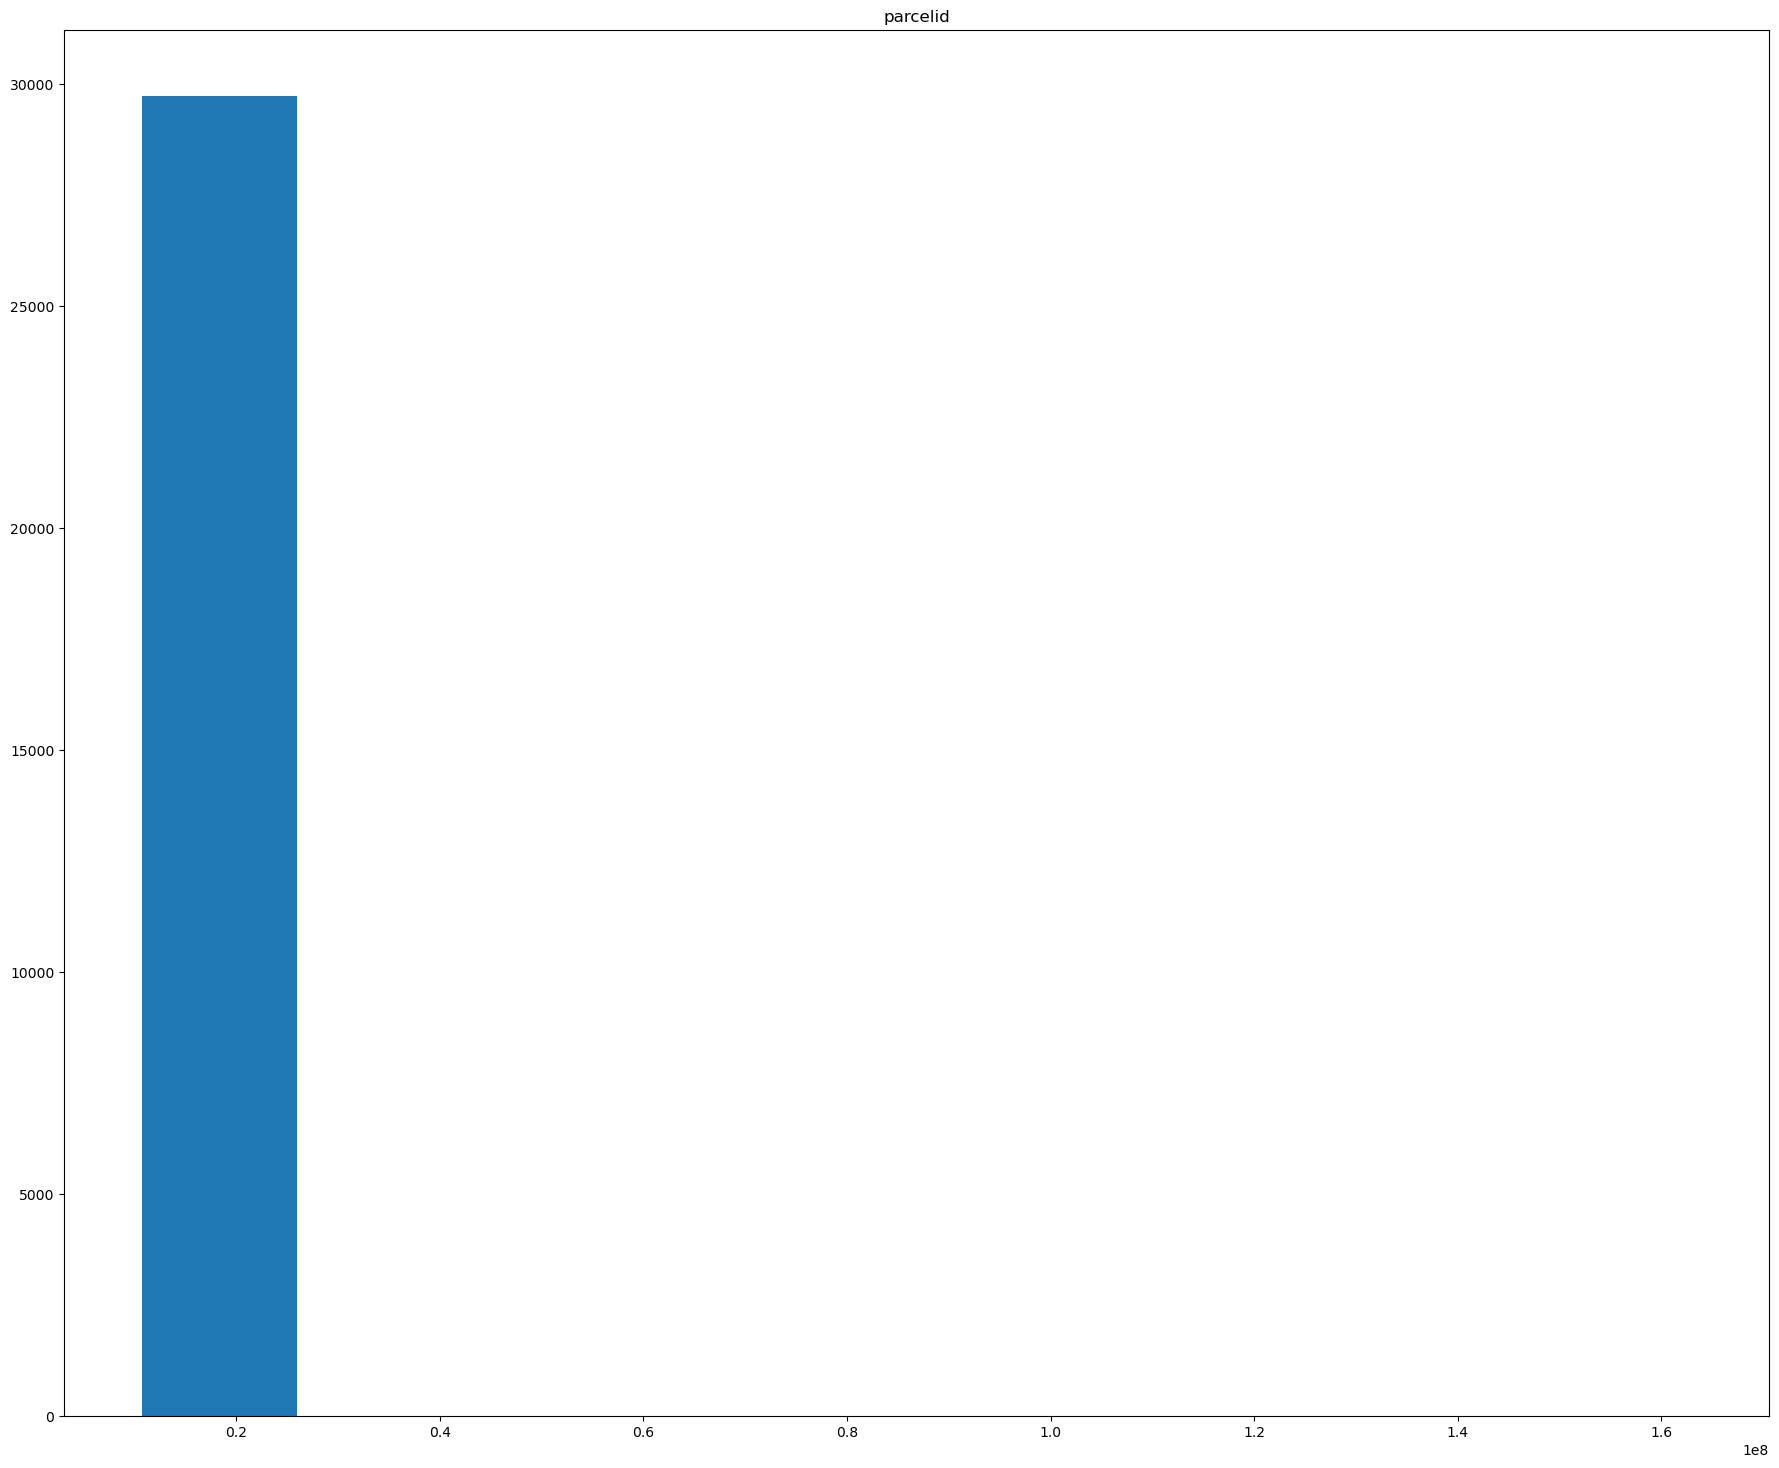

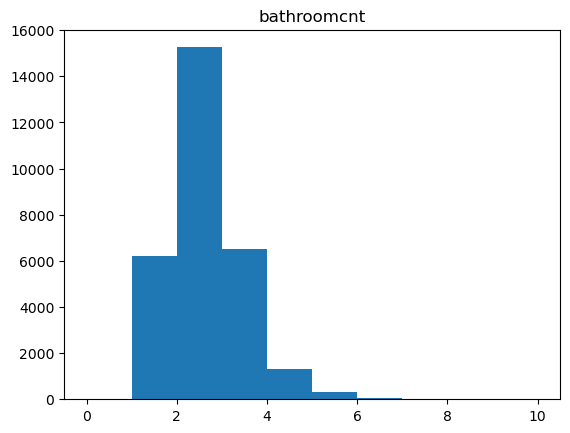

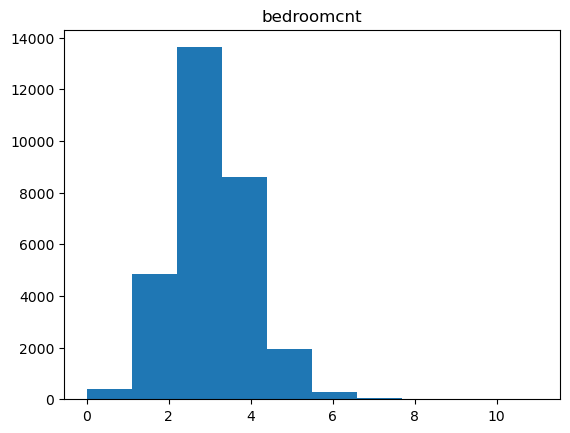

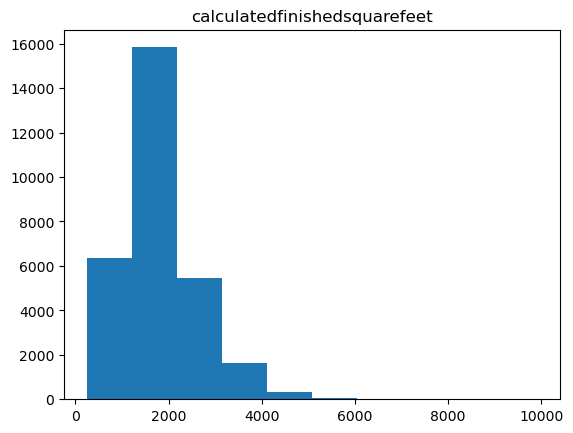

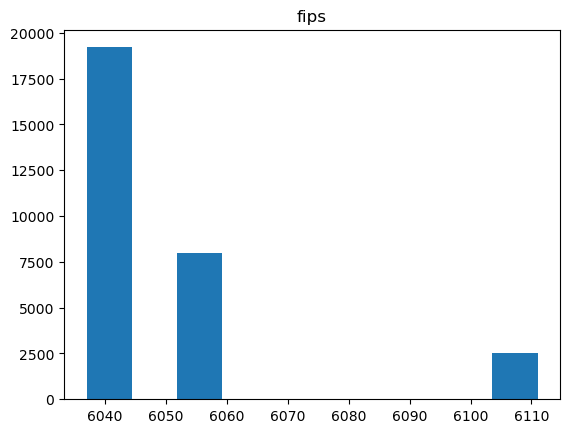

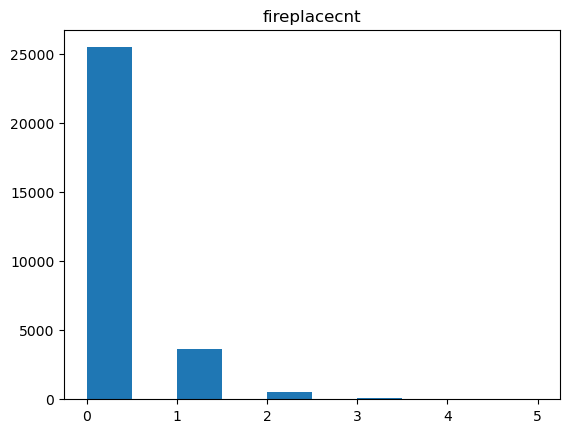

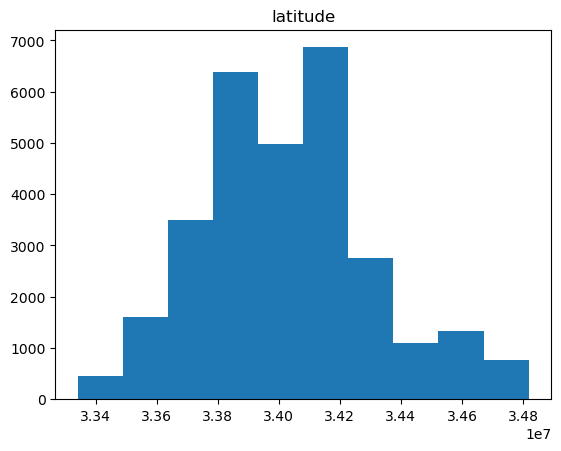

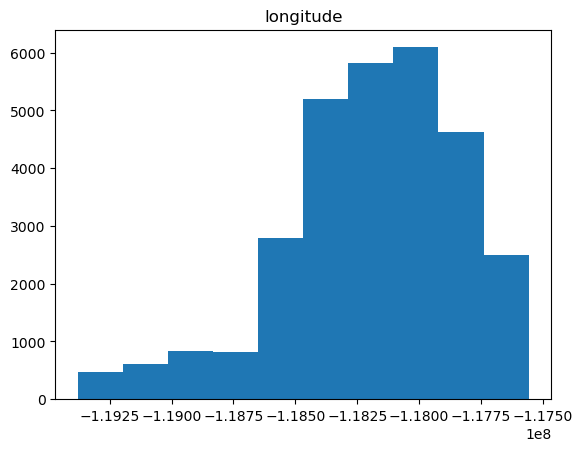

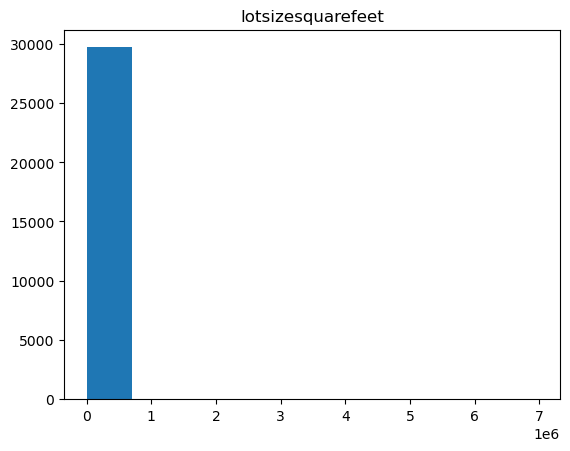

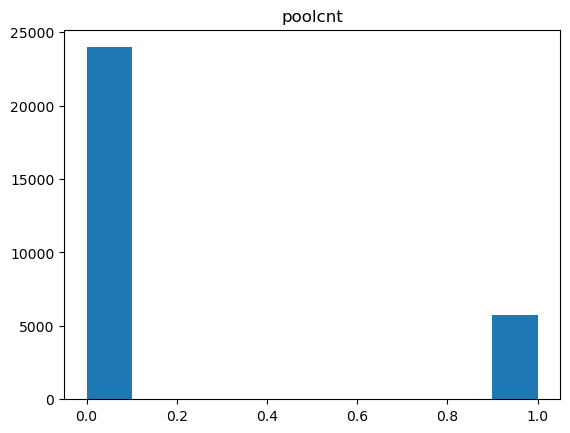

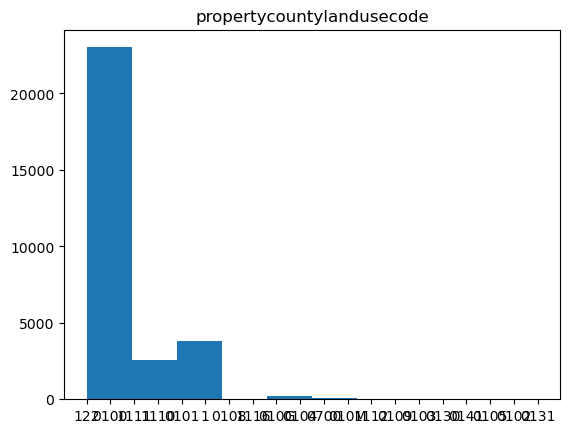

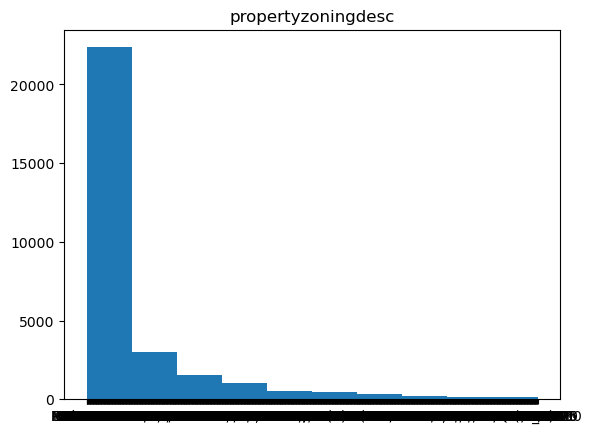

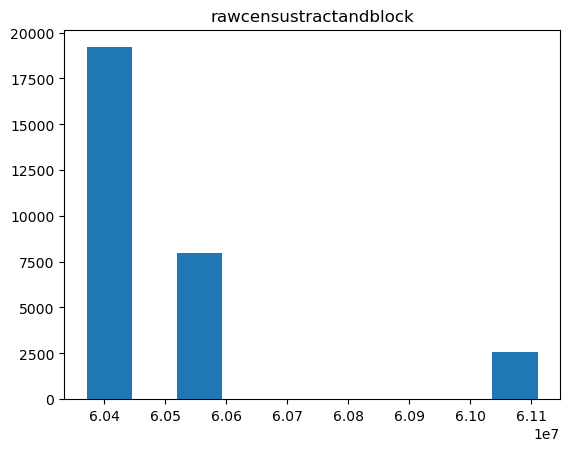

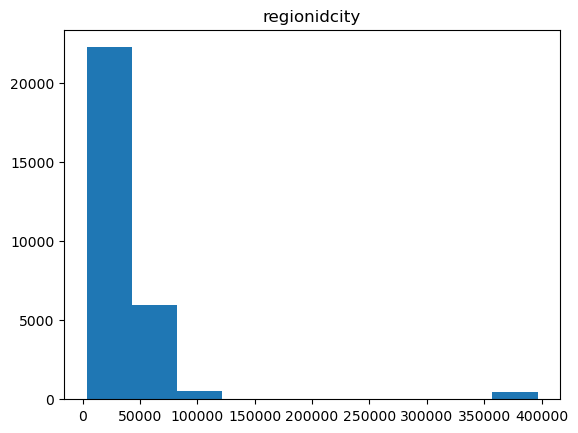

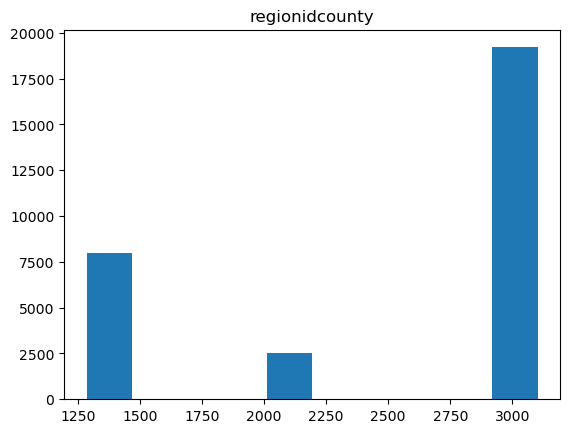

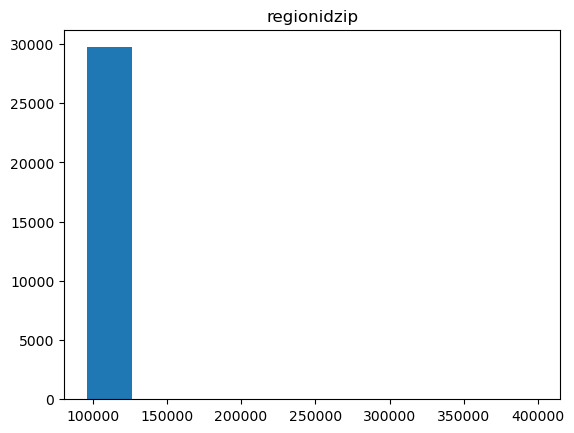

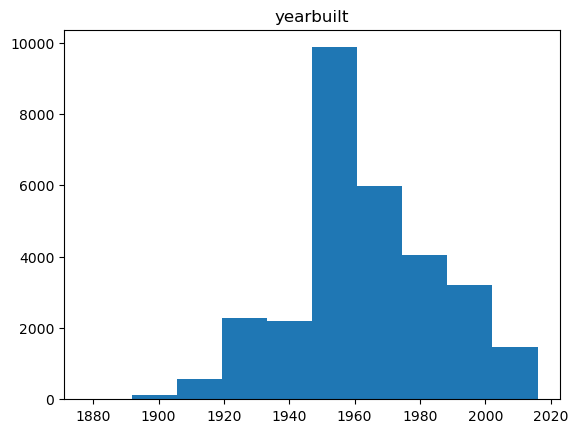

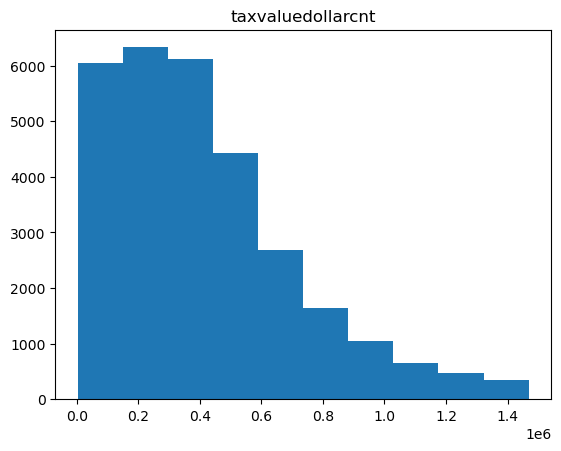

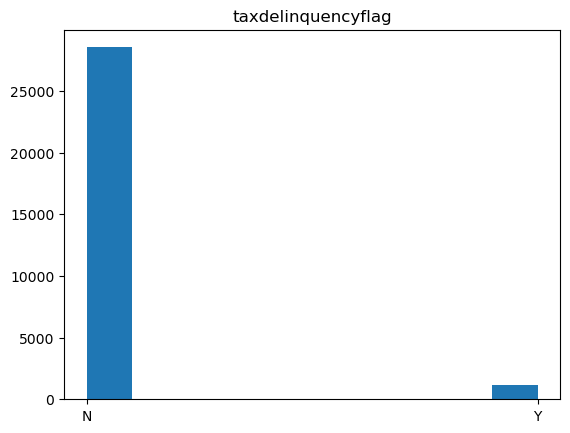

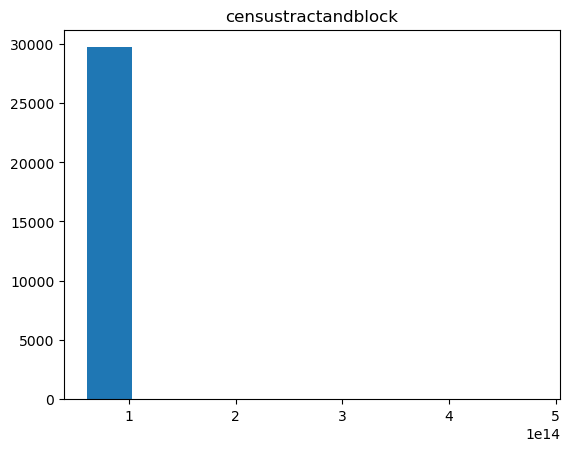

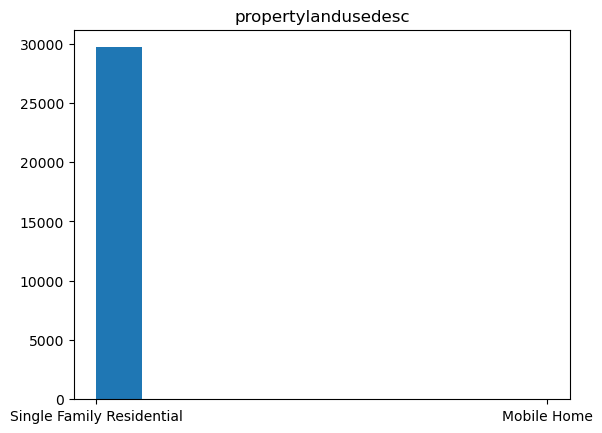

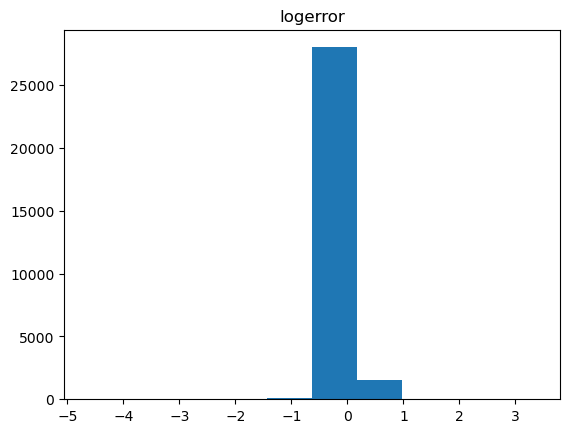

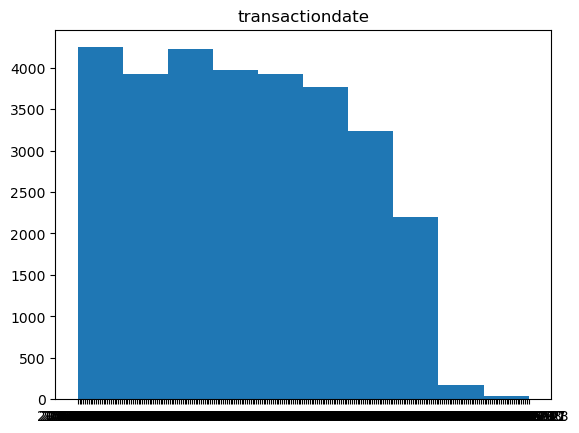

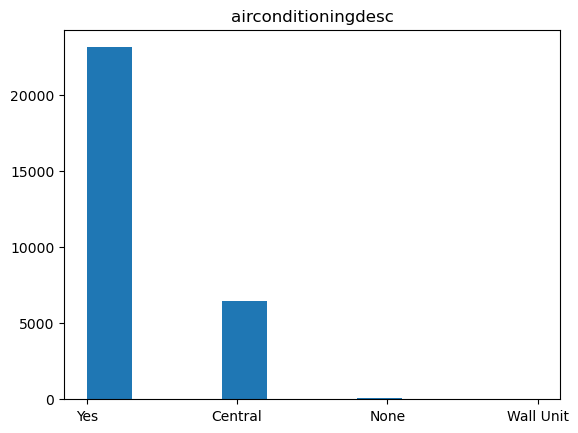

In [9]:

# for col in cols:
#     print(pd.get_dummies(train[col], drop_first=True))
# train.select_dtypes(include='object')
plt.figure(figsize=(22,18))

for i, col in enumerate(train.columns[:]):
    
#     plt.subplot(1,len(train.columns[:]),i+1)
    plt.hist(train[col])

    plt.title(col)
    plt.show()

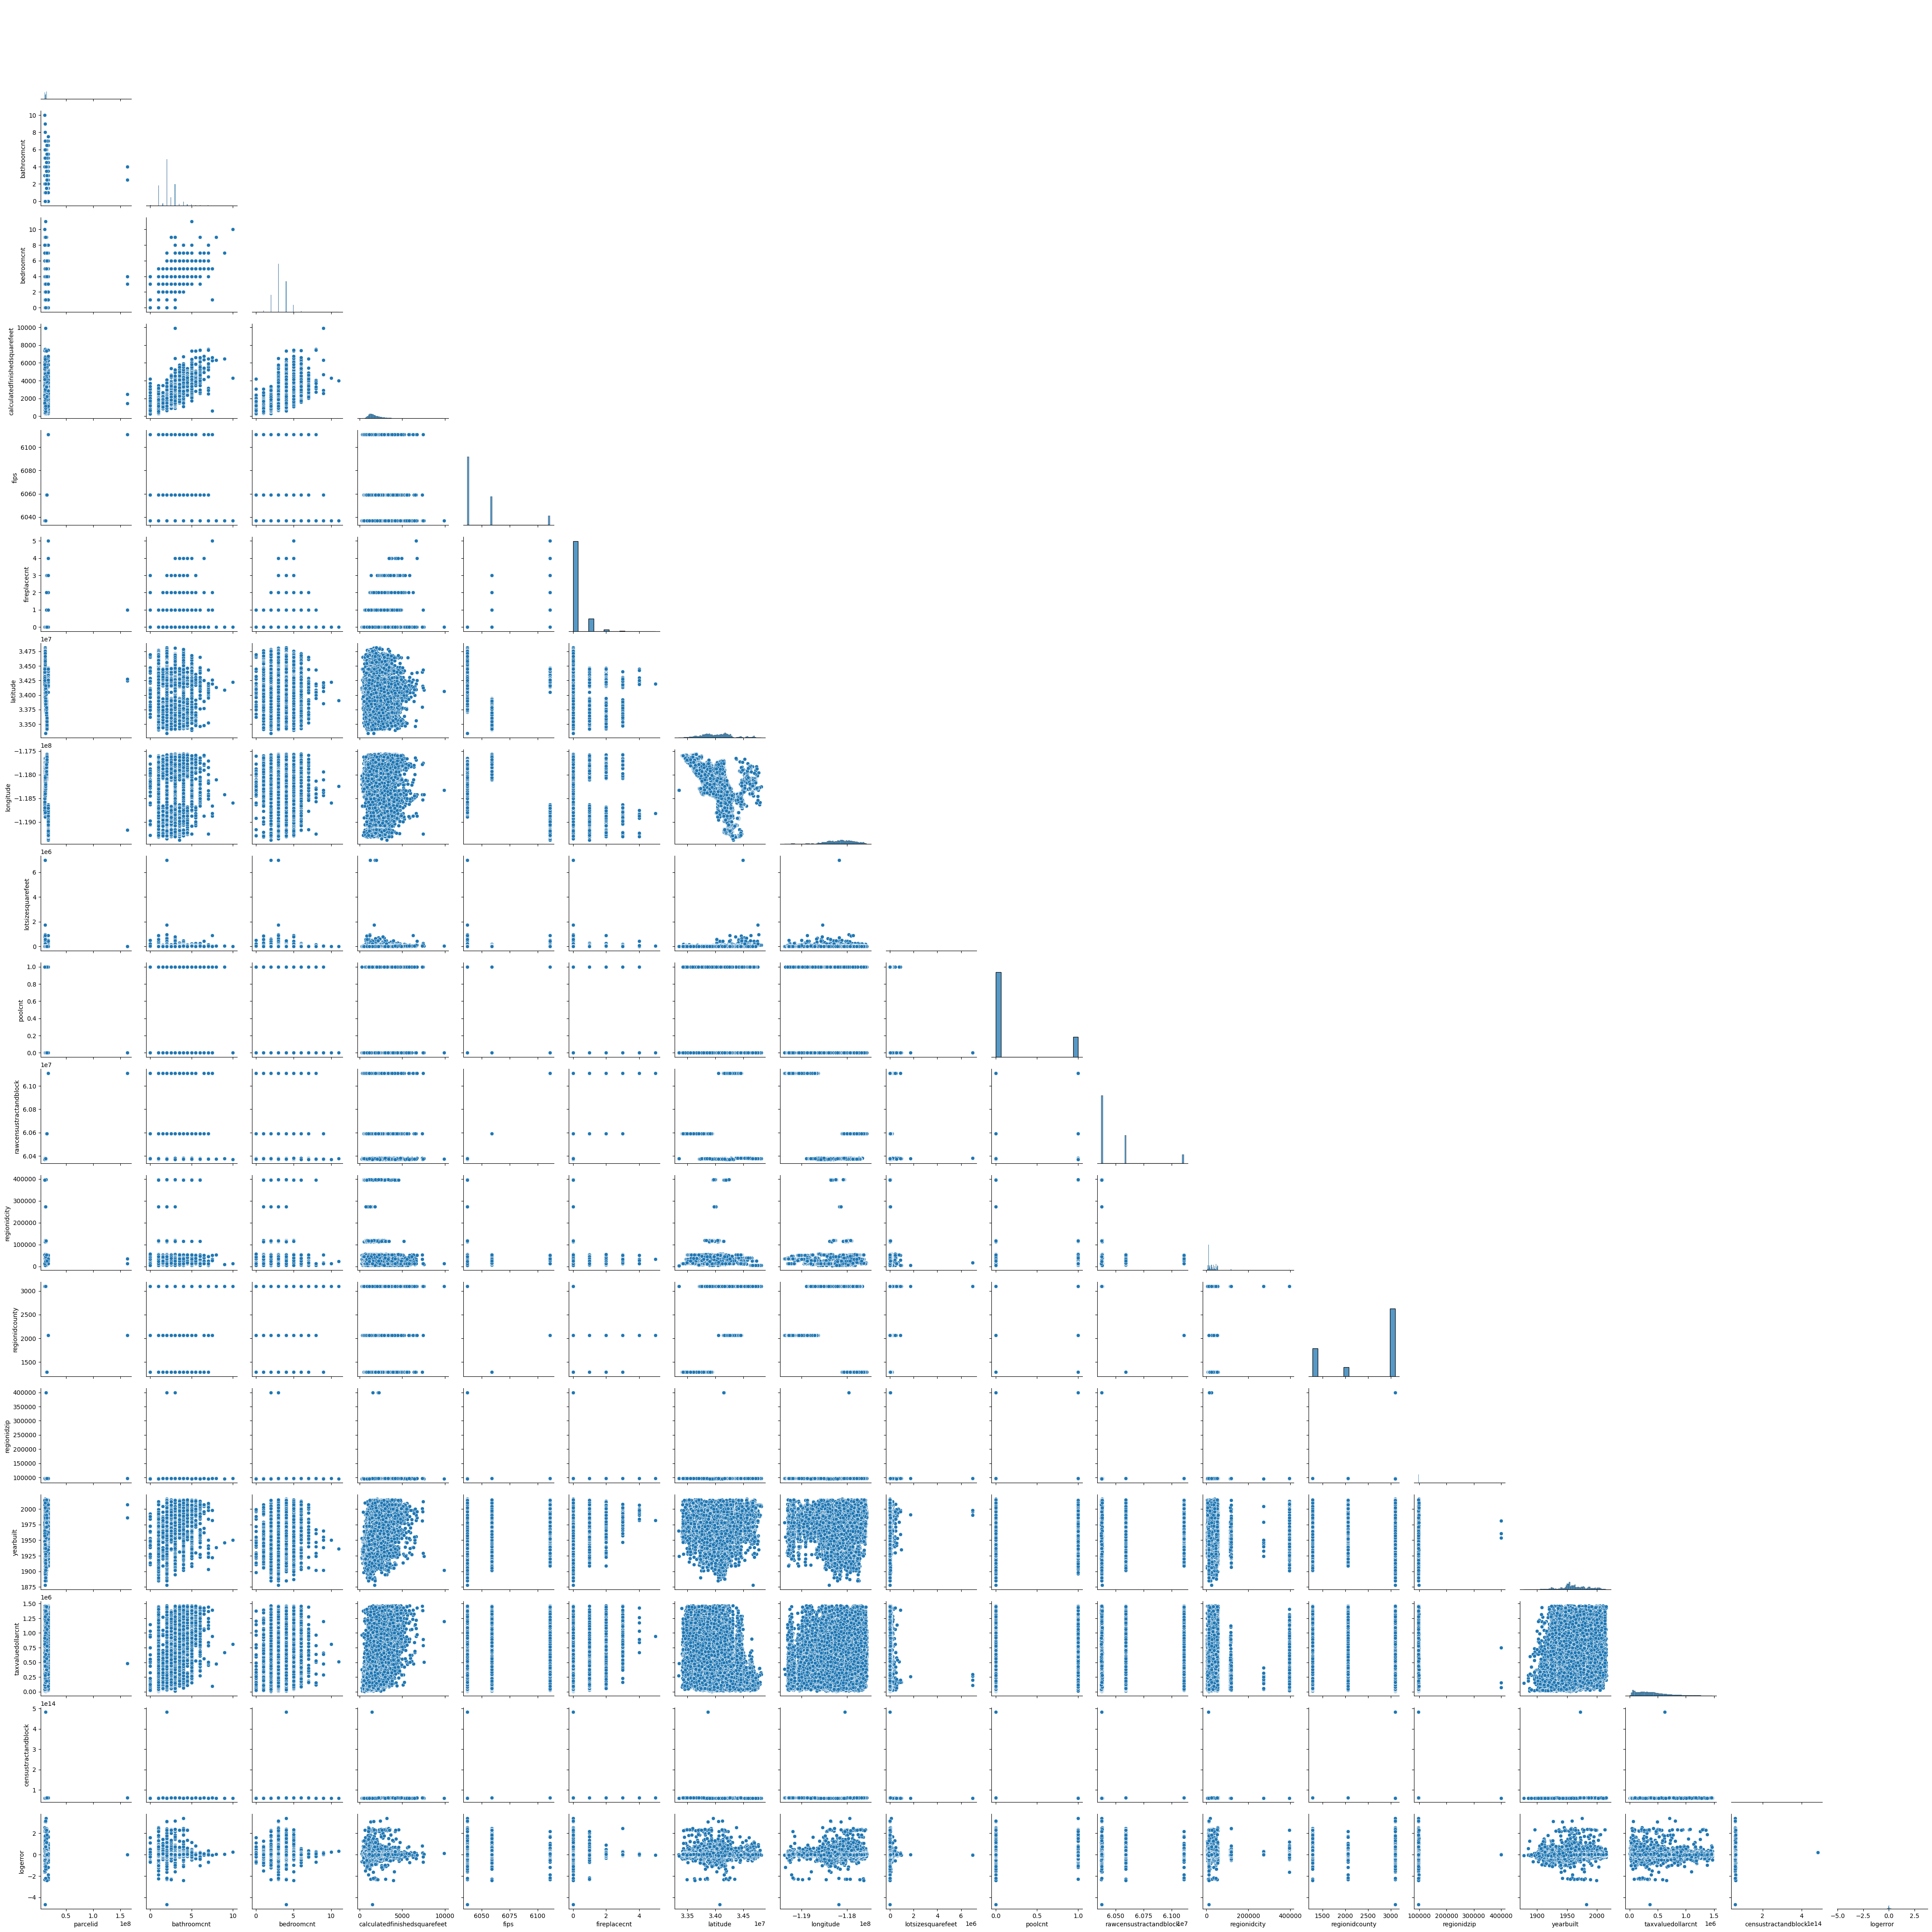

In [10]:


sns.pairplot(train[train.columns], 
             corner=True
            )
plt.show()

In [34]:

for i in train.select_dtypes(exclude = 'object').columns:
    if i not in ['parcelid','latitude','longitude','']:
        try:
            train[f'{i}_bins'] = pd.qcut(train[i], q = 4).astype('str')
        except:
            train[f'{i}_bins'] = pd.cut(train[i], bins = 3).astype('str')
            
train = train.drop(columns = ['logerror_bins'])
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fireplacecnt,latitude,longitude,lotsizesquarefeet,poolcnt,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxdelinquencyflag,censustractandblock,propertylandusedesc,logerror,transactiondate,airconditioningdesc,bathroomcnt_bins,bedroomcnt_bins,calculatedfinishedsquarefeet_bins,fips_bins,fireplacecnt_bins,lotsizesquarefeet_bins,poolcnt_bins,rawcensustractandblock_bins,regionidcity_bins,regionidcounty_bins,regionidzip_bins,yearbuilt_bins,taxvaluedollarcnt_bins,censustractandblock_bins
75331,14299295,2.5,3.0,2044.0,6059,0.0,33678653.0,-117828471.0,3300.0,0.0,122,unknown,6.059053e+07,52650.0,1286.0,96948,1987,419127.0,N,6.059053e+13,Single Family Residential,0.033892,2017-09-11,Yes,"(-0.01, 3.333]","(-0.011, 3.667]","(1617.0, 2186.0]","(6036.926, 6061.667]","(-0.005, 1.667]","(-0.001, 5512.0]","(-0.001, 0.333]","(60590423.234, 61110091.001]","(40227.0, 396556.0]","(1284.185, 1891.0]","(96415.0, 96998.0]","(1978.0, 2016.0]","(353537.0, 564812.5]","(60590423233519.0, 483030105084015.0]"
9438,11998846,2.0,3.0,1670.0,6037,0.0,34077208.0,-118363544.0,6550.0,0.0,0100,LAR1,6.037195e+07,12447.0,3101.0,96029,1926,1395968.0,N,6.037195e+13,Single Family Residential,-0.516389,2017-02-13,Yes,"(-0.01, 3.333]","(-0.011, 3.667]","(1617.0, 2186.0]","(6036.926, 6061.667]","(-0.005, 1.667]","(5512.0, 6750.0]","(-0.001, 0.333]","(60371011.1, 60374019.024]","(3490.999, 12447.0]","(2496.0, 3101.0]","(95981.999, 96213.0]","(1877.999, 1950.0]","(564812.5, 1468559.0]","(60371011101001.0, 60374020023012.0]"
66076,11295854,2.0,4.0,1742.0,6037,0.0,34695505.0,-118101235.0,10174.0,0.0,0100,LRA22*,6.037901e+07,5534.0,3101.0,97318,1986,137442.0,N,6.037901e+13,Single Family Residential,0.010544,2017-08-11,Central,"(-0.01, 3.333]","(3.667, 7.333]","(1617.0, 2186.0]","(6036.926, 6061.667]","(-0.005, 1.667]","(8463.5, 6971010.0]","(-0.001, 0.333]","(60376200.022, 60590423.234]","(3490.999, 12447.0]","(2496.0, 3101.0]","(96998.0, 399675.0]","(1978.0, 2016.0]","(3253.999, 183420.0]","(60376203011007.0, 60590423233519.0]"
75567,13026524,4.0,4.0,2839.0,6037,0.0,34144956.0,-117898507.0,4556.0,0.0,0100,AZR1,6.037401e+07,37015.0,3101.0,96464,2012,551323.0,N,6.037401e+13,Single Family Residential,0.033457,2017-09-11,Central,"(3.333, 6.667]","(3.667, 7.333]","(2186.0, 9918.0]","(6036.926, 6061.667]","(-0.005, 1.667]","(-0.001, 5512.0]","(-0.001, 0.333]","(60371011.1, 60374019.024]","(24812.0, 40227.0]","(2496.0, 3101.0]","(96415.0, 96998.0]","(1978.0, 2016.0]","(353537.0, 564812.5]","(60371011101001.0, 60374020023012.0]"
62310,17092029,2.0,3.0,1627.0,6111,1.0,34274440.0,-119185743.0,9190.0,0.0,1111,unknown,6.111001e+07,34543.0,2061.0,97084,1986,327812.0,N,6.111001e+13,Single Family Residential,0.023845,2017-07-28,Yes,"(-0.01, 3.333]","(-0.011, 3.667]","(1617.0, 2186.0]","(6086.333, 6111.0]","(-0.005, 1.667]","(8463.5, 6971010.0]","(-0.001, 0.333]","(60590423.234, 61110091.001]","(24812.0, 40227.0]","(1891.0, 2496.0]","(96998.0, 399675.0]","(1978.0, 2016.0]","(183420.0, 353537.0]","(60590423233519.0, 483030105084015.0]"


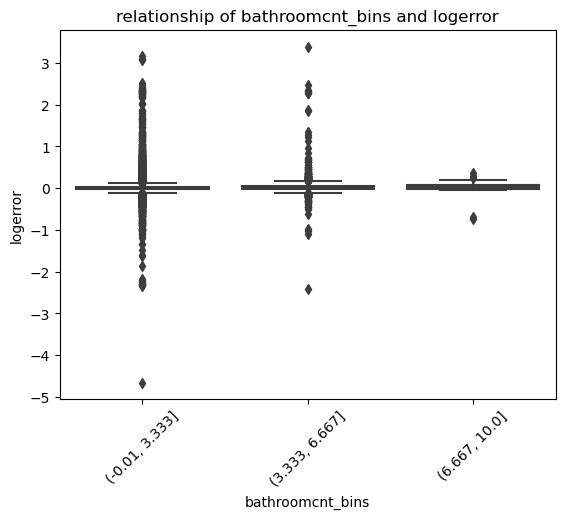

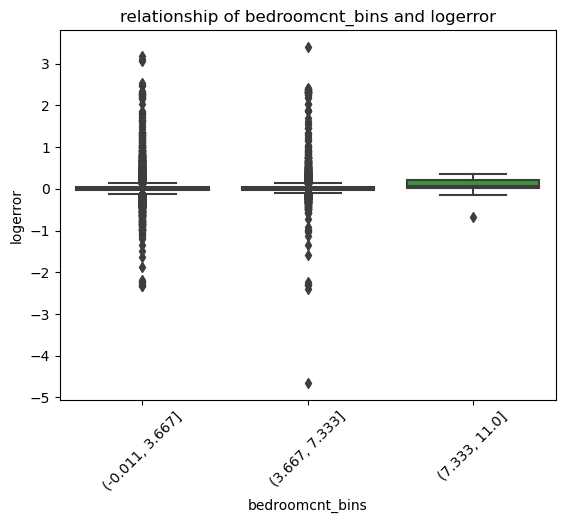

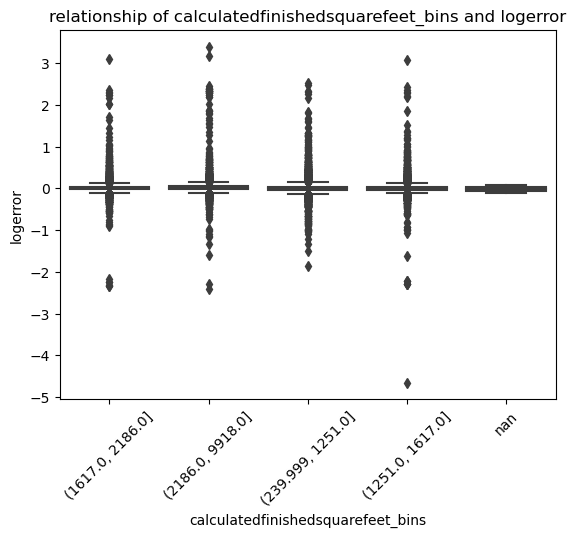

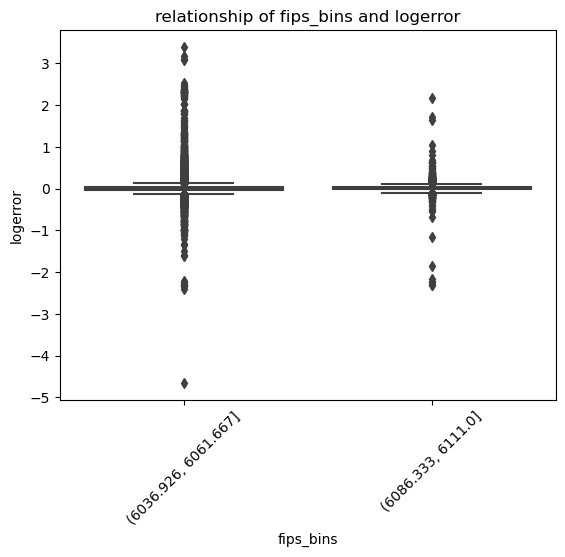

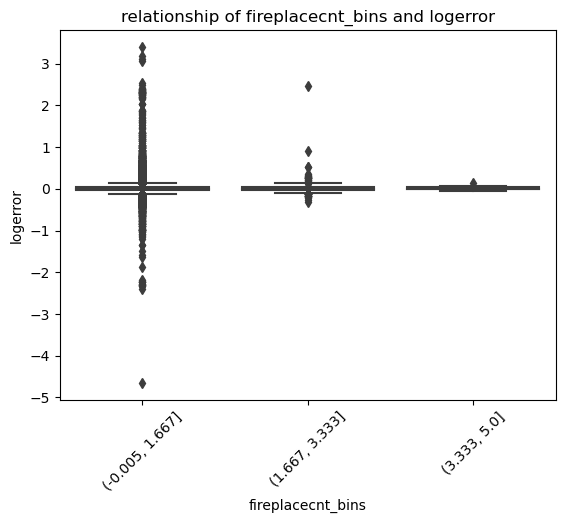

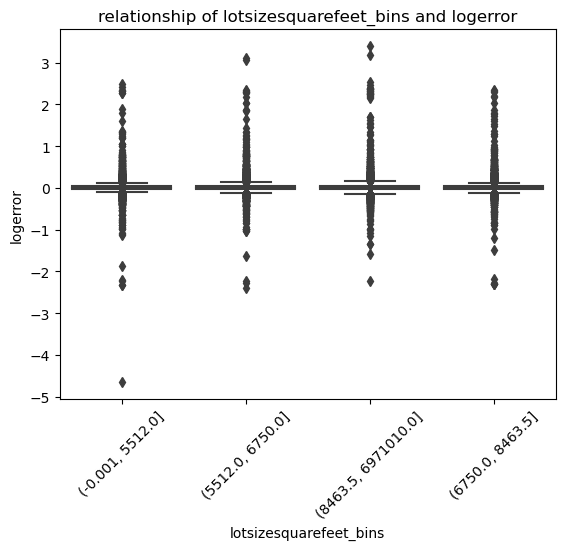

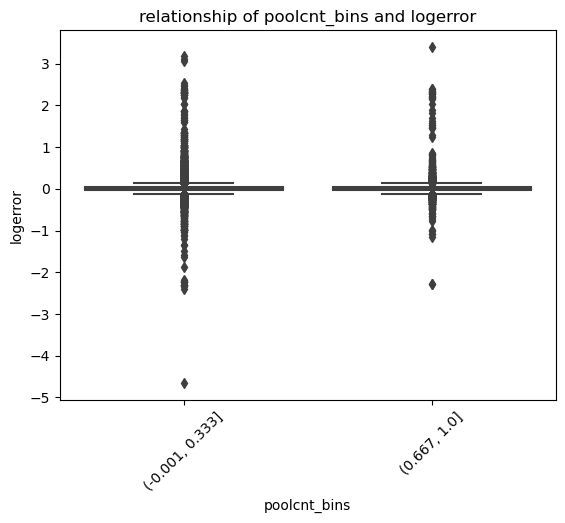

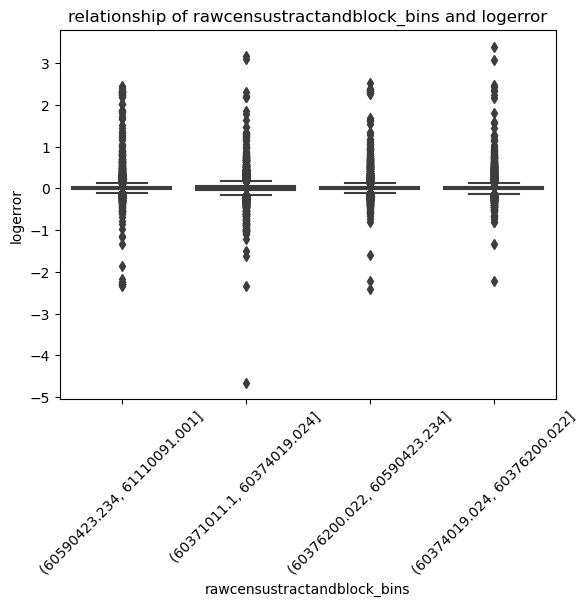

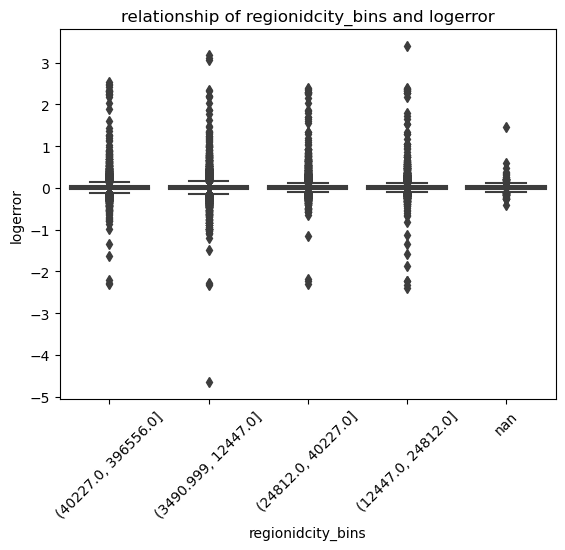

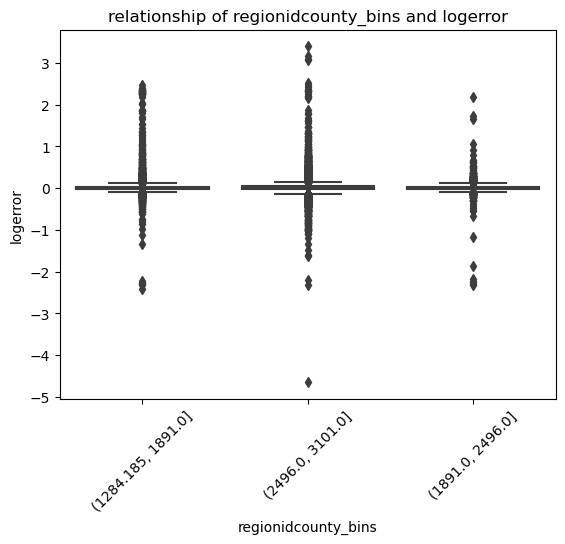

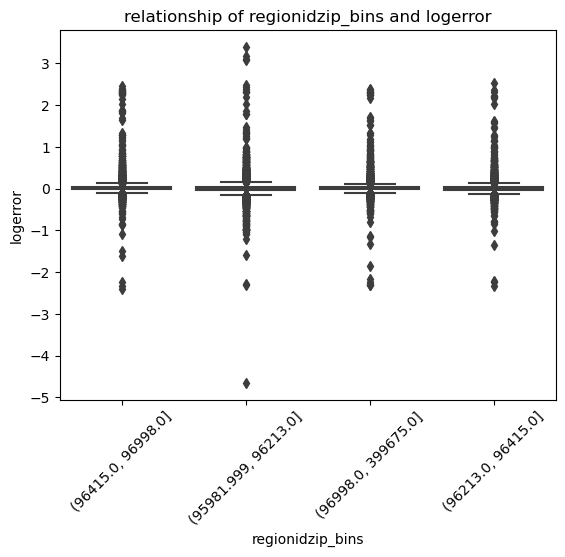

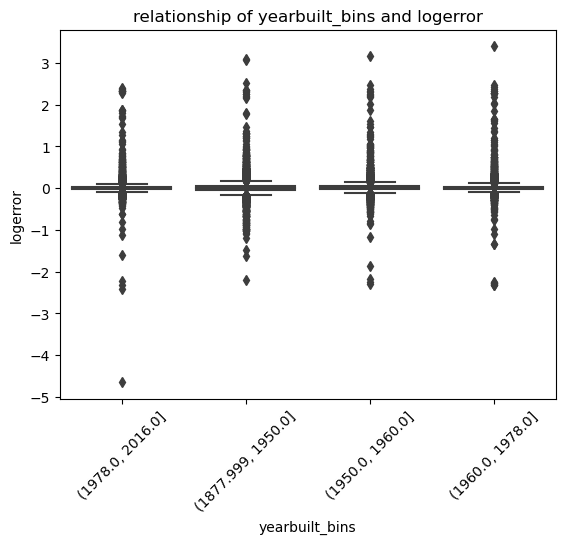

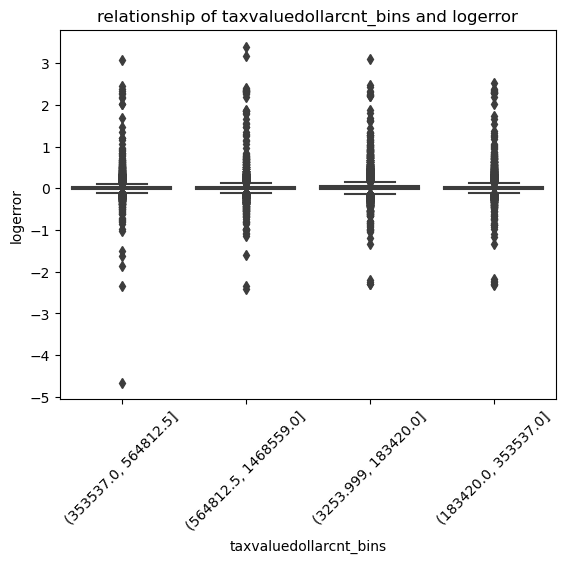

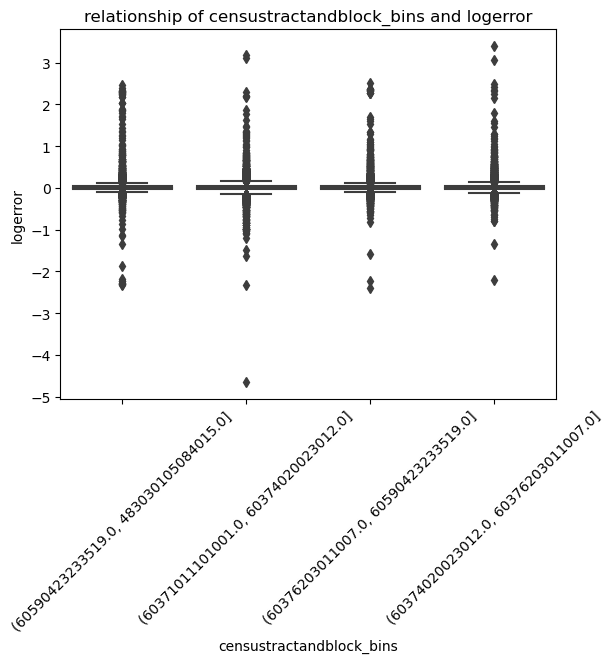

In [37]:
for col in train.iloc[23:]:
    if 'bins' in col:
        sns.boxplot(data=train, x=col, y='logerror')
        plt.title(f'relationship of {col} and logerror')
        plt.xticks(rotation=45)
        plt.show()

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29727 entries, 75331 to 16249
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   parcelid                           29727 non-null  int64  
 1   bathroomcnt                        29727 non-null  float64
 2   bedroomcnt                         29727 non-null  float64
 3   calculatedfinishedsquarefeet       29725 non-null  float64
 4   fips                               29727 non-null  int64  
 5   fireplacecnt                       29727 non-null  float64
 6   latitude                           29727 non-null  float64
 7   longitude                          29727 non-null  float64
 8   lotsizesquarefeet                  29727 non-null  float64
 9   poolcnt                            29727 non-null  float64
 10  propertycountylandusecode          29727 non-null  object 
 11  propertyzoningdesc                 29727 non-null 